In [1]:
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph
from collections import Counter
import numpy as np
import re
import warnings
import os
#warnings.filterwarnings('ignore')

In [2]:
path = 'test/'
files = [path+file for file in os.listdir(path)]
files[0]

'test/aleks.conllu.txt'

In [3]:
file = open(files[0]).read()
tree = [x for x in file.split('\n\n')[0].split('\n')]
tree

['# sent_id = 3',
 '# text = От этого дома через улицу к крыльцу женской гимназии, где квартировал штаб какого-то полка, шла полоса раструшенного сена.',
 '1\tОт\tот\tADP\t_\t_\t3\tcase\t_\t_',
 '2\tэтого\tэтот\tDET\t_\tCase=Gen|Gender=Masc|Number=Sing\t3\tdet\t_\t_',
 '3\tдома\tдом\tNOUN\t_\tAnimacy=Inan|Case=Gen|Gender=Masc|Number=Sing\t17\tobl\t_\t_',
 '4\tчерез\tчерез\tADP\t_\t_\t5\tcase\t_\t_',
 '5\tулицу\tулица\tNOUN\t_\tAnimacy=Inan|Case=Acc|Gender=Fem|Number=Sing\t17\tobl\t_\t_',
 '6\tк\tк\tADP\t_\t_\t7\tcase\t_\t_',
 '7\tкрыльцу\tкрылец\tNOUN\t_\tAnimacy=Inan|Case=Dat|Gender=Masc|Number=Sing\t17\tobl\t_\t_',
 '8\tженской\tженский\tADJ\t_\tCase=Gen|Degree=Pos|Gender=Fem|Number=Sing\t9\tamod\t_\t_',
 '9\tгимназии\tгимназия\tNOUN\t_\tAnimacy=Inan|Case=Gen|Gender=Fem|Number=Sing\t7\tnmod\t_\tSpaceAfter=No',
 '10\t,\t,\tPUNCT\t_\t_\t12\tpunct\t_\t_',
 '11\tгде\tгде\tADV\t_\tDegree=Pos\t12\tadvmod\t_\t_',
 '12\tквартировал\tквартировать\tVERB\t_\tAspect=Imp|Gender=Masc|Mood=Ind|Numb

In [4]:
trees = []

for file in files:
    parsed_sents = open(file).read().split('\n\n')
    
    for sent in parsed_sents:
        tree = [line for line in sent.split('\n') if line[0] != '#']
        trees.append('\n'.join(tree))

In [5]:
trees[1]

'1\tНакануне\tнакануне\tADV\t_\tDegree=Pos\t9\tadvmod\t_\tSpaceAfter=No\n2\t,\t,\tPUNCT\t_\t_\t3\tpunct\t_\t_\n3\tм.\tм.\tPROPN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Sing\t1\tparataxis\t_\tSpaceAfter=No\n4\tб\tб\tPROPN\t_\t_\t3\tflat:name\t_\tSpaceAfter=No\n5\t.\t.\tPUNCT\t_\t_\t4\tpunct\t_\tSpaceAfter=No\n6\t,\t,\tPUNCT\t_\t_\t3\tpunct\t_\t_\n7\tночью\tночь\tNOUN\t_\tAnimacy=Inan|Case=Ins|Gender=Fem|Number=Sing\t1\tconj\t_\tSpaceAfter=No\n8\t,\t,\tPUNCT\t_\t_\t7\tpunct\t_\t_\n9\tшла\tидти\tVERB\t_\tAspect=Imp|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n10\tздесь\tздесь\tADV\t_\tDegree=Pos\t9\tadvmod\t_\t_\n11\tсрочная\tсрочный\tADJ\t_\tCase=Nom|Degree=Pos|Gender=Fem|Number=Sing\t12\tamod\t_\t_\n12\tработа\tработа\tNOUN\t_\tAnimacy=Inan|Case=Nom|Gender=Fem|Number=Sing\t9\tnsubj\t_\tSpaceAfter=No\n13\t,\t,\tPUNCT\t_\t_\t17\tpunct\t_\t_\n14\tа\tа\tCCONJ\t_\t_\t17\tcc\t_\t_\n15\tтеперь\tтеперь\tADV\t_\tDegree=Pos\t17\tadvmod\t_\t_\n16\tвсе\tвсе

In [6]:
[x.replace('\t', ' ') for x in trees[12].split('\n')]

['1 Я я PRON _ Case=Nom|Number=Sing|Person=1 2 nsubj _ _',
 '2 пошел пойти VERB _ Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act 0 root _ _',
 '3 тогда тогда ADV _ Degree=Pos 2 advmod _ _',
 '4 в в ADP _ _ 5 case _ _',
 '5 наборную наборный ADJ _ Case=Acc|Degree=Pos|Gender=Fem|Number=Sing 2 obl _ _',
 '6 узнать узнать VERB _ Aspect=Perf|VerbForm=Inf|Voice=Act 2 xcomp _ _',
 '7 настроение настроение NOUN _ Animacy=Inan|Case=Acc|Gender=Neut|Number=Sing 6 obj _ _',
 '8 рабочих рабочий NOUN _ Animacy=Anim|Case=Gen|Gender=Masc|Number=Plur 7 nmod _ SpaceAfter=No',
 '9 . . PUNCT _ _ 2 punct _ _']

In [16]:
d = DependencyGraph(trees[12])
d.root = d.nodes[1]
print(d.root)

{'address': 1, 'word': 'Я', 'lemma': 'я', 'ctag': 'PRON', 'tag': '_', 'feats': 'Case=Nom|Number=Sing|Person=1', 'head': 2, 'deps': defaultdict(<class 'list'>, {}), 'rel': 'nsubj'}


/Users/mariadolgodvorova/opt/anaconda3/lib/python3.6/site-packages/nltk/parse/dependencygraph.py:399: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node " "that depends on the root element."


In [17]:
d.root = d.nodes[0] 
mynodes = list(d.triples()) 

In [18]:
a = []
s = -1
for i in mynodes:
    s = s + 1
    if mynodes[s][2][1] == 'NOUN' or mynodes[s][2][1] == 'PROPN' or mynodes[s][2][1] == 'INTJ' or mynodes[s][2][1] == 'PRON':
        if mynodes[s + 1][2][1] == 'DET' or mynodes[s + 1][2][1] == 'NUM' or mynodes[s + 1][2][1] == 'ADP':
            a.append(mynodes[s + 1][2][0])
            a.append(mynodes[s][2][0])
      
        elif mynodes[s - 1][2][1] == 'DET' or mynodes[s - 1][2][1] == 'NUM':
            a.append(mynodes[s - 1][2][0])
            a.append(mynodes[s][2][0])

        else:
            a.append(mynodes[s][2][0])

    else:
        pass

In [19]:
a

['Я', 'настроение', 'рабочих']

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

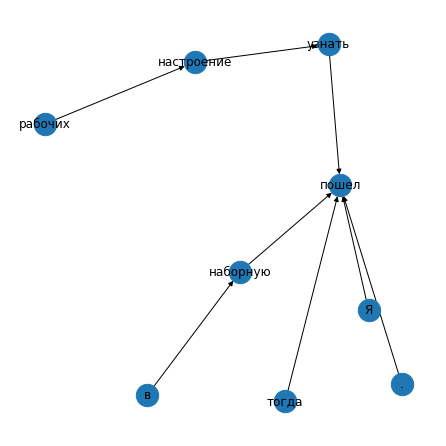

In [23]:
plt.figure(figsize=(6,6))
nx.draw(d.nx_graph(), labels=d.nx_labels, node_size=500)


In [40]:
def get_subtree(nodes, node):
    
    
    if not nodes[node]['deps']:
        return [node]
    
    else:
        return [node] + [get_subtree(nodes, dep) for rel in nodes[node]['deps'] 
                         if rel != 'punct'  # пунктуацию доставать не будем
                         for dep in nodes[node]['deps'][rel]]

In [41]:
get_subtree(d.nodes, 6)

[6]

In [42]:
def flatten(l):
    flat = []
    for el in l:
        if not isinstance(el, list):
            flat.append(el)
        else:
            flat += flatten(el)
    return flat

In [43]:
flatten(get_subtree(d.nodes, 5))

[5]

In [51]:
[d.nodes[i]['word'] for i in flatten(get_subtree(d.nodes, 1))]

['Когда']

In [45]:
[d.nodes[i]['word'] for i in sorted(flatten(get_subtree(d.nodes, 5)))]

[',']